# **Problem Statement**
Telecommunications companies often struggle with retaining customers in a competitive market. Churn, defined as the rate at which customers stop doing business with a company, can significantly impact revenue. The challenge is to analyze customer data to:

1. Identify factors that contribute to customer churn.
2. Build a predictive model to classify whether a customer is likely to churn.
3. Provide actionable insights to reduce churn and improve customer retention.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **Features:**

1. **customerID**: Unique identifier for each customer.

2. **gender**: Gender of the customer (Male/Female).

3. **SeniorCitizen**: Whether the customer is a senior citizen (1 = Yes, 0 = No).

4. **Partner**: Whether the customer has a partner (Yes/No).

5. **Dependents**: Whether the customer has dependents (Yes/No).

6. **tenure**: Number of months the customer has been with the company.

7. **PhoneService**: Whether the customer has phone service (Yes/No).

8. **MultipleLines**: Whether the customer has multiple lines (No/Yes/No phone
service).

9. **InternetService**: Type of internet service (DSL/Fiber optic/No).

10. **OnlineSecurity**: Whether the customer has online security (Yes/No/No internet service).

11. **OnlineBackup**: Whether the customer has online backup (Yes/No/No internet service).

12. **DeviceProtection**: Whether the customer has device protection (Yes/No/No internet service).

13. **TechSupport**: Whether the customer has tech support (Yes/No/No internet service).

14. **StreamingTV**: Whether the customer streams TV (Yes/No/No internet service).

15. **StreamingMovies**: Whether the customer streams movies (Yes/No/No internet service).

16. **Contract**: Type of contract (Month-to-month/One year/Two year).

17. ** PaperlessBilling**: Whether the customer has paperless billing (Yes/No).

18. **PaymentMethod**: Payment method (Electronic check/Mailed check/Bank transfer/Automatic payment).

19. **MonthlyCharges**: Monthly charges billed to the customer.

20. **TotalCharges**: Total amount charged to the customer.

21. **Churn**: Whether the customer has churned (Yes/No) - Target Variable.

# **Objective:**
Using the provided dataset, develop a data-driven solution to predict customer churn. This will help the company proactively address at-risk customers and improve customer satisfaction.

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.shape

(7043, 21)

# Descriptive statistics

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



missing values

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Cleaning

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['customerID']=le.fit_transform(df['customerID'])
df['gender']=le.fit_transform(df['gender'])
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['PhoneService']=le.fit_transform(df['PhoneService'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['DeviceProtection	']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['Contract']=le.fit_transform(df['Contract'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['Churn']=le.fit_transform(df['Churn'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DeviceProtection\t
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,29.85,0,0
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.95,1889.5,0,2
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,53.85,108.15,1,0
3,5535,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,42.30,1840.75,0,2
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,1,1,3,84.80,1990.5,0,2
7039,1525,0,0,1,1,72,1,2,1,0,...,0,2,2,1,1,1,103.20,7362.9,0,2
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,1,2,29.60,346.45,0,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,1,3,74.40,306.6,1,0


# Visualization

hist is used to show histogram of each element

array([[<Axes: title={'center': 'customerID'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'Partner'}>,
        <Axes: title={'center': 'Dependents'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'PhoneService'}>,
        <Axes: title={'center': 'MultipleLines'}>,
        <Axes: title={'center': 'InternetService'}>,
        <Axes: title={'center': 'OnlineSecurity'}>],
       [<Axes: title={'center': 'OnlineBackup'}>,
        <Axes: title={'center': 'DeviceProtection'}>,
        <Axes: title={'center': 'TechSupport'}>,
        <Axes: title={'center': 'StreamingTV'}>,
        <Axes: title={'center': 'StreamingMovies'}>],
       [<Axes: title={'center': 'Contract'}>,
        <Axes: title={'center': 'PaperlessBilling'}>,
        <Axes: title={'center': 'PaymentMethod'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'Churn'}>],
       [<

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


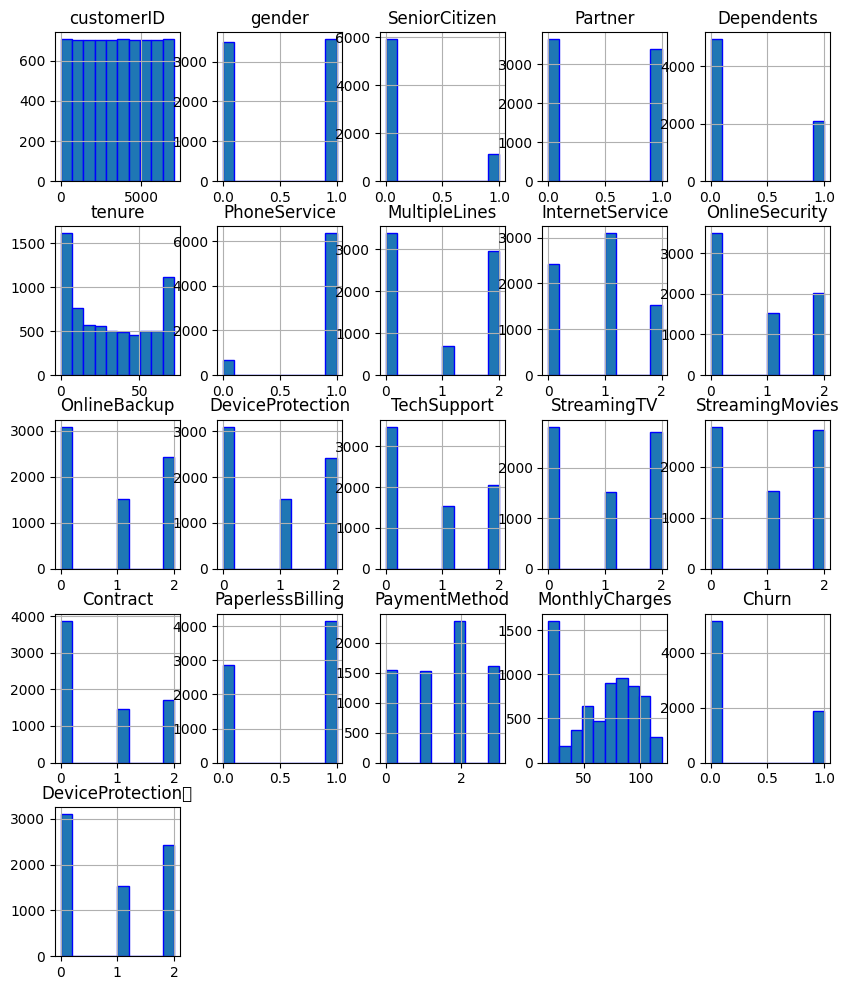

In [ ]:
df.hist(edgecolor="b",figsize=[10,12])

This line is used to create a countplot to visualize the distribution of the 'loan_status' variable in your DataFrame df

<Axes: xlabel='Churn', ylabel='count'>

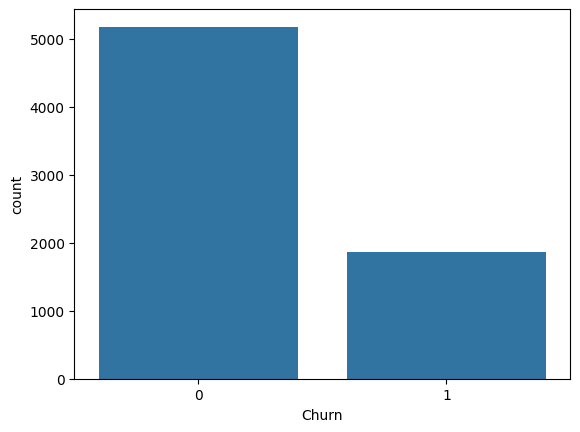

In [ ]:
sns.countplot(x="Churn",data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   int64  
 1   gender             7043 non-null   int64  
 2   SeniorCitizen      7043 non-null   int64  
 3   Partner            7043 non-null   int64  
 4   Dependents         7043 non-null   int64  
 5   tenure             7043 non-null   int64  
 6   PhoneService       7043 non-null   int64  
 7   MultipleLines      7043 non-null   int64  
 8   InternetService    7043 non-null   int64  
 9   OnlineSecurity     7043 non-null   int64  
 10  OnlineBackup       7043 non-null   int64  
 11  DeviceProtection   7043 non-null   int64  
 12  TechSupport        7043 non-null   int64  
 13  StreamingTV        7043 non-null   int64  
 14  StreamingMovies    7043 non-null   int64  
 15  Contract           7043 non-null   int64  
 16  PaperlessBilling   7043 

In [ ]:
# Replace empty strings with NaN and then convert to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   int64  
 1   gender             7043 non-null   int64  
 2   SeniorCitizen      7043 non-null   int64  
 3   Partner            7043 non-null   int64  
 4   Dependents         7043 non-null   int64  
 5   tenure             7043 non-null   int64  
 6   PhoneService       7043 non-null   int64  
 7   MultipleLines      7043 non-null   int64  
 8   InternetService    7043 non-null   int64  
 9   OnlineSecurity     7043 non-null   int64  
 10  OnlineBackup       7043 non-null   int64  
 11  DeviceProtection   7043 non-null   int64  
 12  TechSupport        7043 non-null   int64  
 13  StreamingTV        7043 non-null   int64  
 14  StreamingMovies    7043 non-null   int64  
 15  Contract           7043 non-null   int64  
 16  PaperlessBilling   7043 

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

This code snippet is designed to handle class imbalance in your dataset by using the SMOTE (Synthetic Minority Over-sampling Technique) oversampling method.

In [ ]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']


# Applying SMOTE for oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


X_resampled=pd.DataFrame(X_resampled,columns=X.columns)
y_resampled=pd.Series(y_resampled,name='Churn')
# concatenate  X_resampled is a DataFrame and y_resampled is series to allow
df=pd.concat([X_resampled,y_resampled],axis=1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DeviceProtection\t,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.850000,29.850000,0,0
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.950000,1889.500000,2,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,53.850000,108.150000,0,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,42.300000,1840.750000,2,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.700000,151.650000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,3985,0,1,0,0,2,1,0,1,0,...,1,0,1,0,0,1,89.992099,177.872738,2,1
10344,659,0,0,0,0,10,1,1,1,0,...,0,0,0,0,1,2,76.563693,789.812866,0,1
10345,5731,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,2,52.890909,52.890909,0,1
10346,3239,0,0,0,0,6,0,0,0,1,...,0,0,0,0,1,2,39.443438,220.704447,0,1


This code snippet aims to visualize and display the class distribution of your target variable ('loan_status') after applying the SMOTE oversampling technique

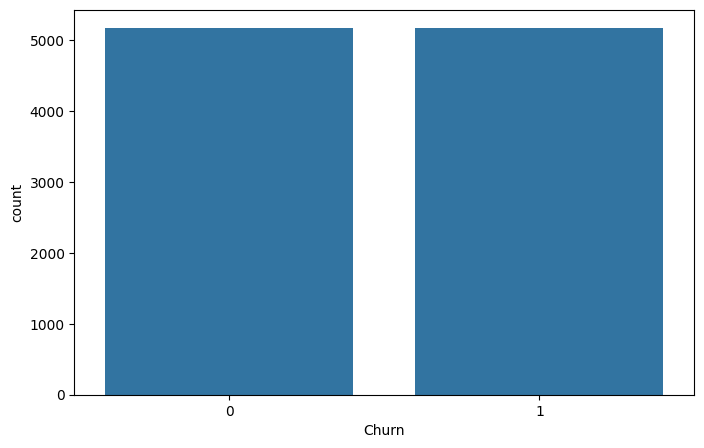

Churn
0    5174
1    5174
Name: count, dtype: int64


In [ ]:
# Plot the class distribution after oversampling
# Convert the oversampled target to a Pandas Series
y_resampled_series = pd.Series(y_resampled)

# Plot the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled_series)
plt.show()

# Display the count of each class
print(y_resampled_series.value_counts())

# Correlation Analysis

A heatmap was generated to understand the correlation between different features:

In [ ]:
correlation=df.corr()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


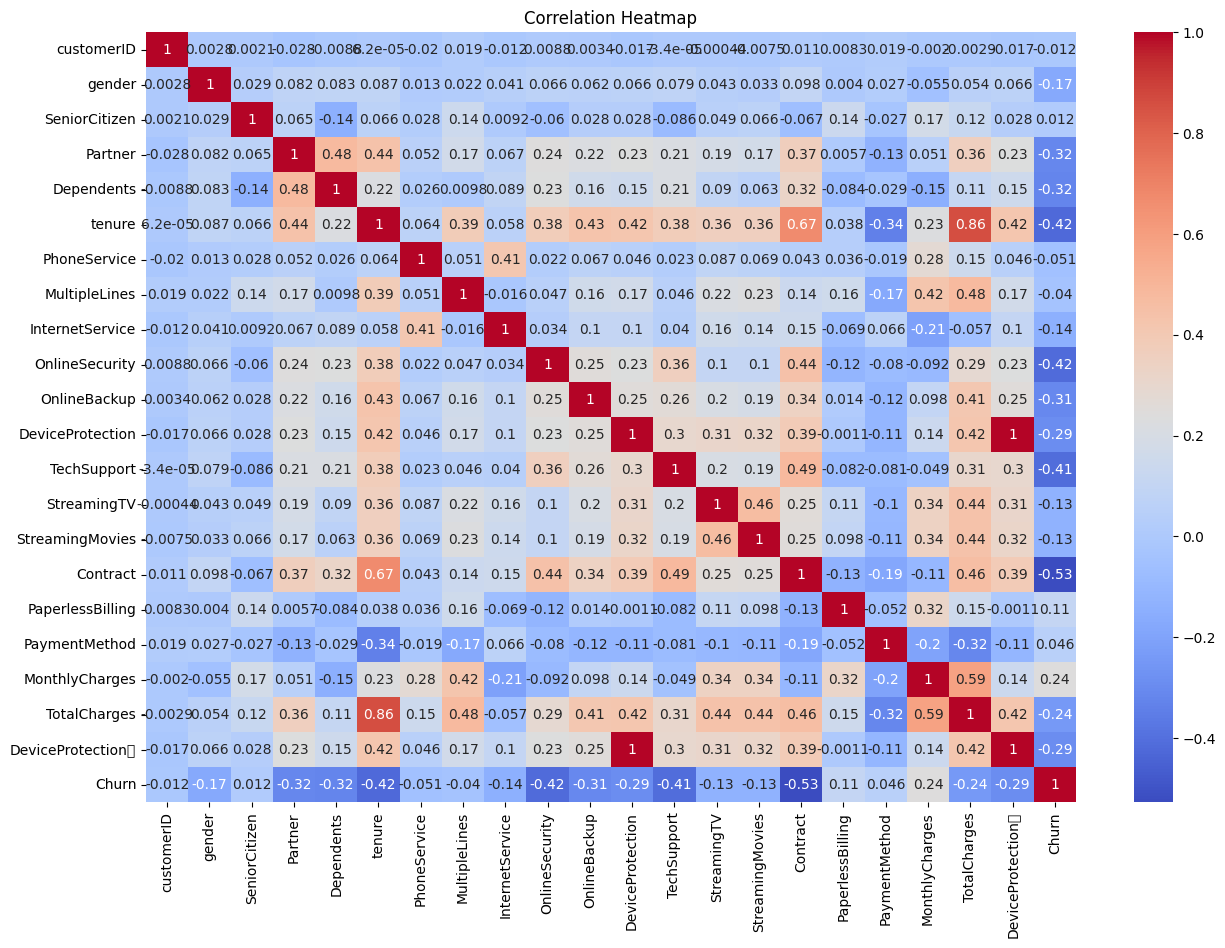

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Feature selection

Low-correlation features and those with high skewness were dropped from the dataset:

In [ ]:
df.drop(['customerID'], axis=1, inplace=True)
df.drop(['TotalCharges'],axis=1,inplace=True)
df.drop(['MonthlyCharges'],axis=1,inplace=True)
df.drop(['DeviceProtection'],axis=1,inplace=True)
df.drop(['gender'],axis=1,inplace=True)
df.drop(['MultipleLines'],axis=1,inplace=True)
df.drop(['OnlineBackup'],axis=1,inplace=True)
df.drop(['SeniorCitizen'],axis=1,inplace=True)
df.drop(['StreamingMovies'],axis=1,inplace=True)
df.drop(['StreamingTV'],axis=1,inplace=True)
df.drop(['Partner'],axis=1,inplace=True)
df.drop(['Dependents'],axis=1,inplace=True)
df.drop(['PhoneService'],axis=1,inplace=True)
df.drop(['InternetService'],axis=1,inplace=True)
df.drop(['PaperlessBilling'],axis=1,inplace=True)
df

,tenure,OnlineSecurity,TechSupport,Contract,PaymentMethod,DeviceProtection\t,Churn
0,1,0,0,0,2,0,0
1,34,2,0,1,3,2,0
2,2,2,0,0,3,0,1
3,45,2,2,1,0,2,0
4,2,0,0,0,2,0,1
...,...,...,...,...,...,...,...
10343,2,0,1,0,1,2,1
10344,10,0,0,0,2,0,1
10345,1,0,0,0,2,0,1
10346,6,1,0,0,2,0,1


In [ ]:
df.columns

Index(['tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod',
       'DeviceProtection\t', 'Churn'],
      dtype='object')

# Outlier Detection

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


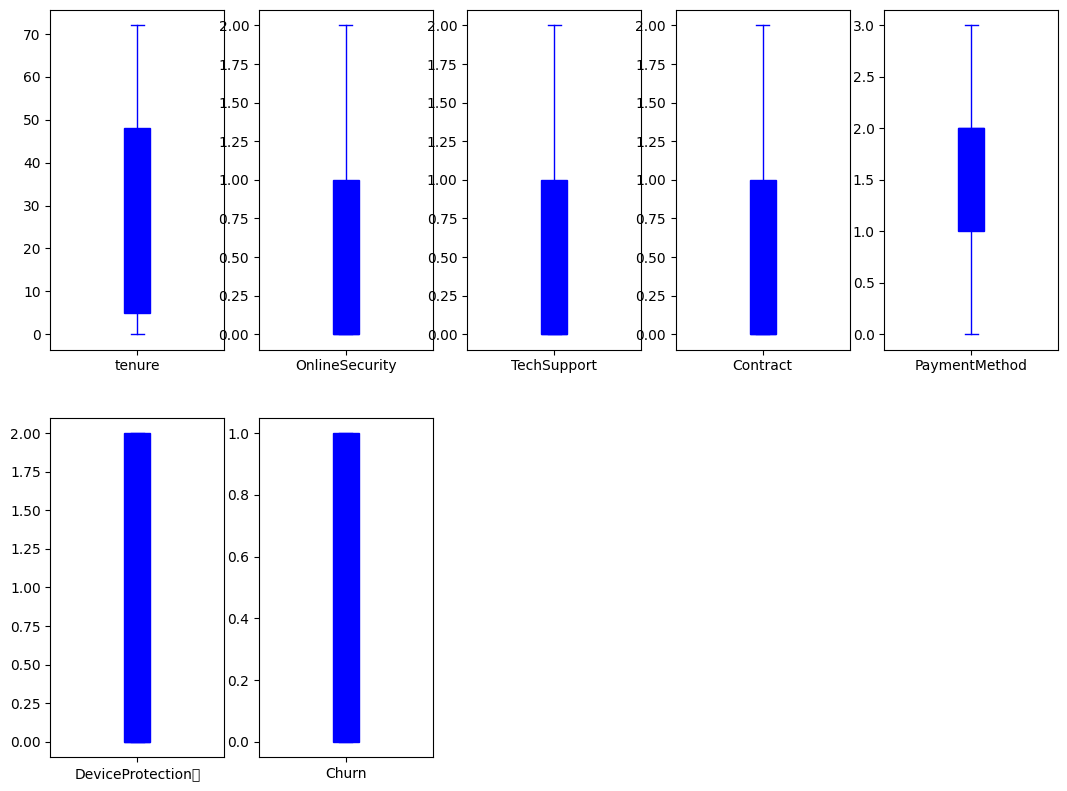

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,5), figsize=(13,15), color='blue', patch_artist=True)
plt.show()

# Feature Engineer


This line of code applies a natural logarithm (log base e) transformation to your DataFrame df and stores the result in a new variable called data.

In [ ]:
data=np.log(df+1)

This code snippet is designed to visualize the distribution of your log-transformed data using a histogram and a kernel density estimate (KDE) plot. It utilizes the matplotlib.pyplot and seaborn libraries for plotting.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


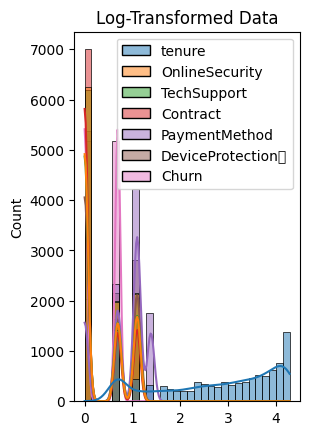

In [ ]:
# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

This code aims to visualize the distribution of each feature in your dataset data after a log transformation has been applied. It uses seaborn and matplotlib libraries for plotting.

<ipython-input-355-b9f1ba6d7d4b>:10: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


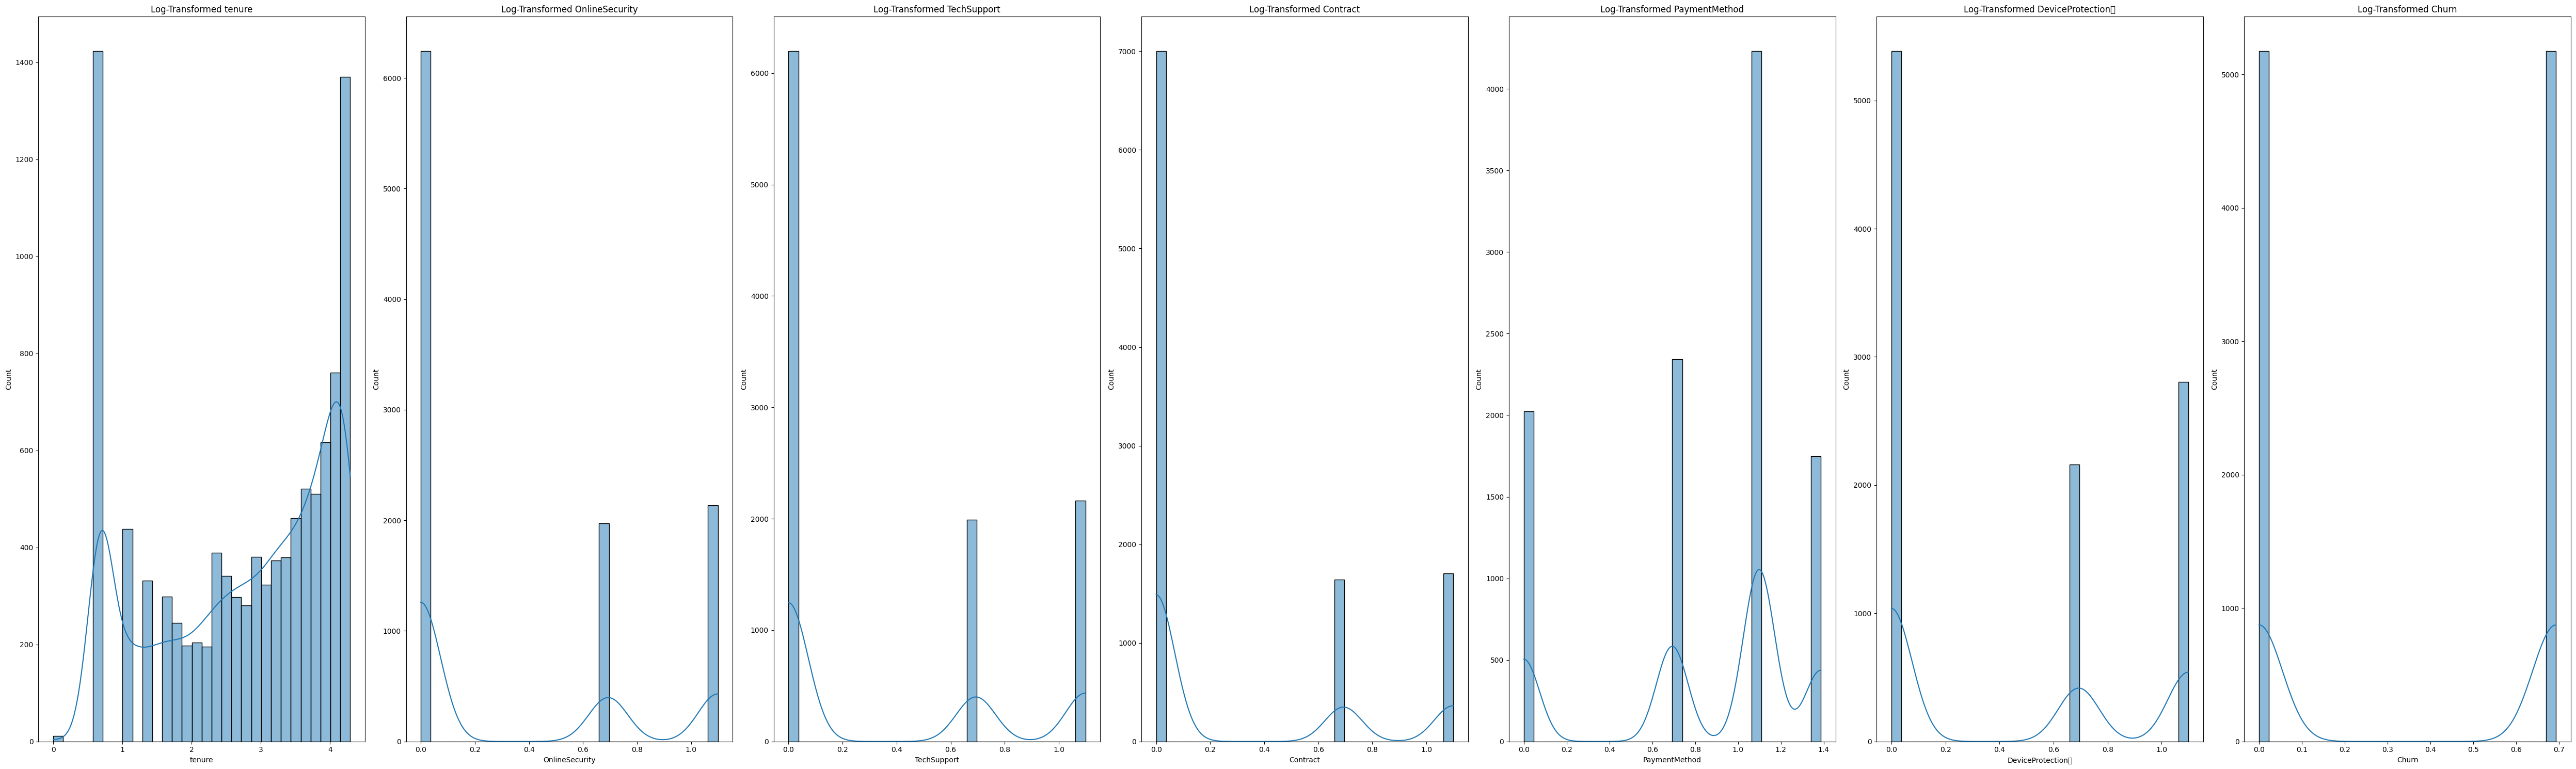

In [ ]:
# Assuming df is a DataFrame with multiple features
num_features = data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

# Dimensionally Reduction

In [ ]:
data['Churn']= (data['Churn'] > 0.5).astype(int)
x=[['tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod',
       'DeviceProtection\t', 'Churn']]
y=["Churn"]

# Initial modeling and hypothesis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier

this line of code is used to split the data into training and testing sets for your machine learning model.

In [ ]:
x = data[['tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod',
       'DeviceProtection\t']]
y = data['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

these lines of code are crucial for creating and training your Random Forest Classifier model.

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

This code is used to generate predictions on the test data using your trained Random Forest Classifier model.

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

This code snippet is used to create and visualize a confusion matrix to evaluate the performance of your classification model.

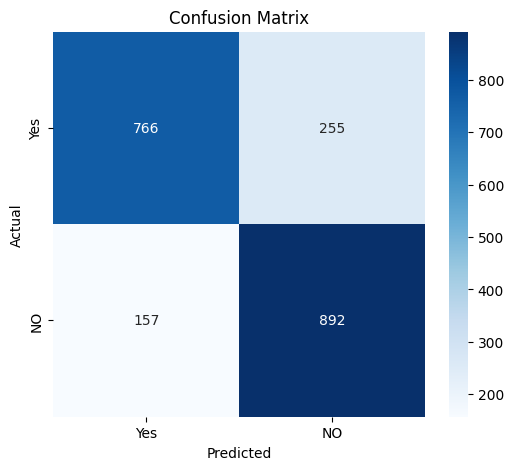

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'NO'], yticklabels=['Yes', 'NO'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This line imports functions from the sklearn.metrics module that are used to evaluate the performance of a classification model.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, accuracy_score

This code snippet calculates and prints the accuracy, precision, recall, and F1 score of your classification model to evaluate its performance.

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8009661835748793
Precision: 0.7776809067131648
Recall: 0.8503336510962822
F1 Score: 0.8123861566484517


This code snippet is designed to take user input for four features (tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod',
       'DeviceProtection\t) and then use a trained Random Forest Classifier model (model) to predict the customer churn (churn).




In [ ]:
tenture=float(input("tenture:"))
OnlineSecurity=float(input("OnlineSecurity:"))
TechSupport=float(input("TechSupport:"))
Contract=float(input("Contract:"))
PaymentMethod=float(input("PaymentMethod:"))
DeviceProtection=float(input("DeviceProtection:"))
user_input = np.array([[tenture, OnlineSecurity, TechSupport, Contract, PaymentMethod, DeviceProtection]])
churn=model.predict(user_input)
print("Churn:", churn)

tenture:8
OnlineSecurity:6
TechSupport:8
Contract:9
PaymentMethod:7
DeviceProtection:4
Churn: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
